# Figure 2: Connectivity

In [1]:
import numpy as np
from aisynphys.database import default_db as db
from aisynphys.cell_class import CellClass, classify_cells, classify_pairs
from aisynphys.connectivity import measure_connectivity, connectivity_profile, pair_was_probed, measure_distance

##### Load all mouse data

In [2]:
projects = ['mouse V1 coarse matrix', 'mouse V1 pre-production']
mouse_pairs = db.pair_query(project_name=projects).all()
print("loaded %d cell pairs" % len(mouse_pairs))

loaded 78334 cell pairs


##### Define  and create Cell Classes

In [3]:
cell_class_criteria = {
    'l23pyr': {'dendrite_type': 'spiny',       'target_layer': '2/3'},
    'l23pv':  {'cre_type': 'pvalb',            'target_layer': '2/3'},
    'l23sst': {'cre_type': 'sst',              'target_layer': '2/3'},
    'l23vip': {'cre_type': 'vip',              'target_layer': '2/3'},
    'l4pyr':  {'cre_type': ('nr5a1'),          'target_layer': '4'},
    'l4pv':   {'cre_type': 'pvalb',            'target_layer': '4'},
    'l4sst':  {'cre_type': 'sst',              'target_layer': '4'},
    'l4vip':  {'cre_type': 'vip',              'target_layer': '4'},
    'l5et':   {'cre_type': ('sim1', 'fam84b'), 'target_layer': '5'},
    'l5it':   {'cre_type': 'tlx3',             'target_layer': '5'}, 
    'l5pv':   {'cre_type': 'pvalb',            'target_layer': '5'},
    'l5sst':  {'cre_type': 'sst',              'target_layer': '5'},
    'l5vip':  {'cre_type': 'vip',              'target_layer': '5'},
    'l6pyr':  {'cre_type': 'ntsr1',            'target_layer': '6'},
    'l6pv':   {'cre_type': 'pvalb',            'target_layer': '6'},
    'l6sst':  {'cre_type': 'sst',              'target_layer': '6'},
    'l6vip':  {'cre_type': 'vip',              'target_layer': '6'},
}

cell_classes = {name:CellClass(name=name, **criteria) for name,criteria in cell_class_criteria.items()}

###### Measure connection probability between Cell Classes

In [4]:
# Group all cells by selected classes
cell_groups = classify_cells(cell_classes.values(), pairs=mouse_pairs)

# Group pairs into (pre_class, post_class) groups
pair_groups = classify_pairs(mouse_pairs, cell_groups)

# analyze matrix elements
connectivity_results = measure_connectivity(pair_groups)

### Display connectivity heatmap, Figure 2A

In [5]:
# attempt to make a colormap that looks like the one we've been using (close but not quite)
from matplotlib.colors import LinearSegmentedColormap

cdict = {'red':   [(0.0,  0.0, 0.0),
                   (0.2,  0.3, 0.3),
                   (0.4,  0.5, 1.0),
                   (0.6,  1.0, 1.0),
                   (0.8,  1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  0.0, 0.0),
                   (0.2,  0.0, 0.0),
                   (0.4,  0.0, 0.0),
                   (0.6,  0.4, 0.4),
                   (0.8,  1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'blue':  [(0.0,  0.4, 0.4),
                   (0.2,  0.3, 0.3),
                   (0.4,  0.0, 0.0),
                   (0.6,  0.0, 0.0),
                   (0.8,  0.4, 0.4),
                   (1.0,  1.0, 1.0)]}

cmap2 = LinearSegmentedColormap('Cmap2', cdict)

# [0, 0.01, 0.03, 0.1, 0.3, 1.0],
#                 [(0,0,100, 255), (80,0,80, 255), (140,0,0, 255), (255,100,0, 255), (255,255,100, 255), (255,255,255, 255)]

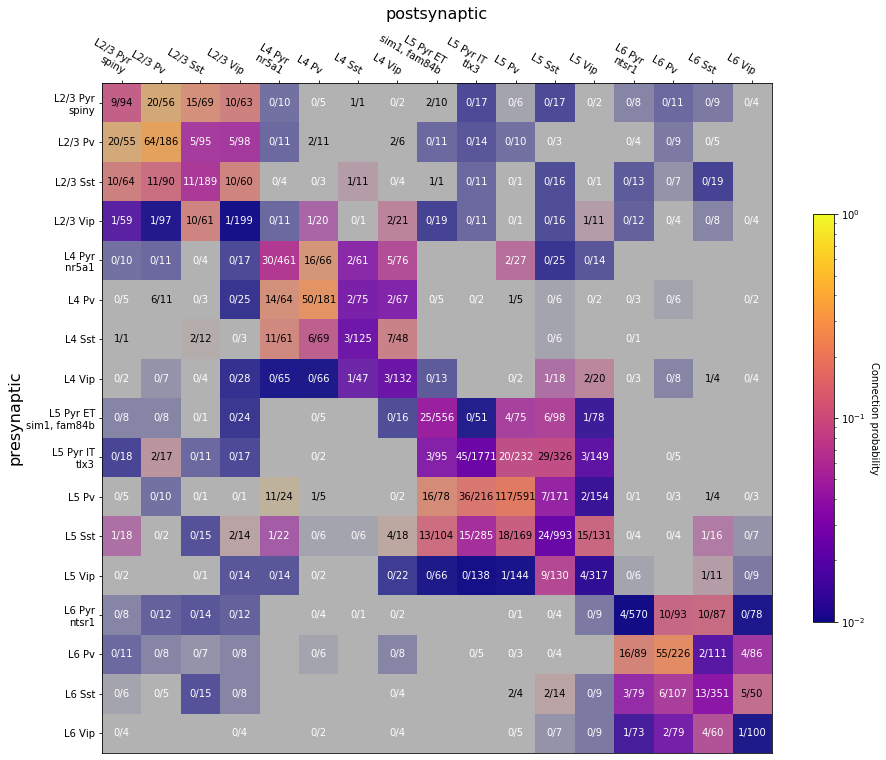

In [37]:
import matplotlib.colors, matplotlib.cm
import matplotlib.pyplot as plt
from aisynphys.ui.notebook import show_connectivity_matrix
%matplotlib inline

# define a colormap and log normalization used to color the heatmap
norm = matplotlib.colors.LogNorm(vmin=0.01, vmax=1.0, clip=True)
cmap = matplotlib.cm.get_cmap('plasma')

# define the display labels to use for each cell subclass:
class_labels = {
    'l23pyr': 'L2/3 Pyr\nspiny',
    'l23pv':  'L2/3 Pv',
    'l23sst': 'L2/3 Sst',
    'l23vip': 'L2/3 Vip',
    'l4pyr':  'L4 Pyr\n nr5a1',
    'l4pv':   'L4 Pv',
    'l4sst':  'L4 Sst',
    'l4vip':  'L4 Vip',
    'l5et':   'L5 Pyr ET\nsim1, fam84b',
    'l5it':   'L5 Pyr IT\ntlx3',
    'l5pv':   'L5 Pv',
    'l5sst':  'L5 Sst',
    'l5vip':  'L5 Vip',
    'l6pyr':  'L6 Pyr\nntsr1',
    'l6pv':   'L6 Pv',
    'l6sst':  'L6 Sst',
    'l6vip':  'L6 Vip',
}

# create a figure/axes to draw on
conn_fig, ax = plt.subplots(figsize=(15, 15))

# finally, draw the colormap using the provided function:
im, cbar, labels = show_connectivity_matrix(
    ax=ax, 
    results=connectivity_results, 
    pre_cell_classes=cell_classes.values(), 
    post_cell_classes=cell_classes.values(), 
    class_labels=class_labels, 
    cmap=cmap, 
    norm=norm
)

In [30]:
cell_class_criteria_cortical = {
    'l23pyr': {'dendrite_type': 'spiny',       'cortical_layer': '2/3'},
    'l23pv':  {'cre_type': 'pvalb',            'cortical_layer': '2/3'},
    'l23sst': {'cre_type': 'sst',              'cortical_layer': '2/3'},
    'l23vip': {'cre_type': 'vip',              'cortical_layer': '2/3'},
    'l4pyr':  {'cre_type': ('nr5a1', 'rorb'),  'cortical_layer': '4'},
    'l4pv':   {'cre_type': 'pvalb',            'cortical_layer': '4'},
    'l4sst':  {'cre_type': 'sst',              'cortical_layer': '4'},
    'l4vip':  {'cre_type': 'vip',              'cortical_layer': '4'},
    'l5et':   {'cre_type': ('sim1', 'fam84b'), 'cortical_layer': '5'},
    'l5it':   {'cre_type': 'tlx3',             'cortical_layer': '5'}, 
    'l5pv':   {'cre_type': 'pvalb',            'cortical_layer': '5'},
    'l5sst':  {'cre_type': 'sst',              'cortical_layer': '5'},
    'l5vip':  {'cre_type': 'vip',              'cortical_layer': '5'},
    'l6pyr':  {'cre_type': 'ntsr1',            'cortical_layer': ('6a','6b')},
    'l6pv':   {'cre_type': 'pvalb',            'cortical_layer': ('6a','6b')},
    'l6sst':  {'cre_type': 'sst',              'cortical_layer': ('6a','6b')},
    'l6vip':  {'cre_type': 'vip',              'cortical_layer': ('6a','6b')},
}

cell_classes_cortical = {name:CellClass(name=name, **criteria) for name,criteria in cell_class_criteria_cortical.items()}

# Group all cells by selected classes
cell_groups_cortical = classify_cells(cell_classes_cortical.values(), pairs=mouse_pairs)

# Group pairs into (pre_class, post_class) groups
pair_groups_cortical = classify_pairs(mouse_pairs, cell_groups_cortical)

# analyze matrix elements
results_cortical = measure_connectivity(pair_groups_cortical)

In [42]:
pre_classes = cell_classes.values()
post_classes = cell_classes.values()

shape = (len(pre_classes), len(post_classes))
cprob_target = np.zeros(shape)
n_conn_target = np.zeros(shape)
n_probed_target = np.zeros(shape)
cprob_cortical = np.zeros(shape)
n_conn_cortical = np.zeros(shape)
n_probed_cortical = np.zeros(shape)


for i,pre_class in enumerate(pre_classes):
        for j,post_class in enumerate(post_classes):
            result = connectivity_results[pre_class, post_class]
            cp, cp_lower_ci, cp_upper_ci = result['connection_probability']
            cprob_target[i,j] = cp
            n_conn_target[i,j] = result['n_connected']
            n_probed_target[i, j] = result['n_probed']
            
            
classes_cortical = cell_classes_cortical.values()
            
for i,pre_class in enumerate(classes_cortical):
        for j,post_class in enumerate(classes_cortical):
            result = results_cortical[pre_class, post_class]
            cp, cp_lower_ci, cp_upper_ci = result['connection_probability']
            cprob_cortical[i,j] = cp
            n_conn_cortical[i,j] = result['n_connected']
            n_probed_cortical[i, j] = result['n_probed']

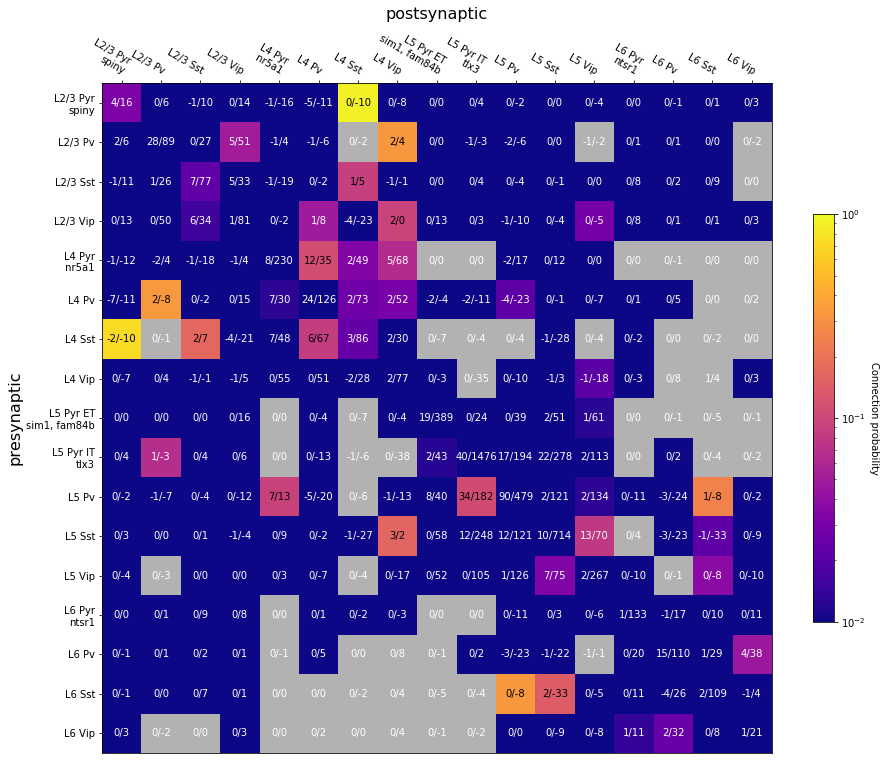

In [45]:
from aisynphys.ui.notebook import heatmap, annotate_heatmap

diff_fig, ax = plt.subplots(figsize=(15,15))

cprob_diff = cprob_target - cprob_cortical
conn_diff = n_conn_target - n_conn_cortical
probed_diff = n_probed_target - n_probed_cortical


mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
cprob_rgba = mapper.to_rgba(np.clip(cprob_diff, 0.01, 1.0))

alpha = np.zeros(shape)
string = np.zeros(shape, dtype=object)
for i in range(len(pre_classes)):
    for j in range(len(post_classes)):
        alpha[i, j] = 1 if np.isfinite(cprob_diff[i, j]) else 0
        string[i, j] = "%d/%d" % (conn_diff[i,j], probed_diff[i,j])

cprob_rgba[:, :, 3] = np.clip(alpha, 0, 1)

pre_class_labels = [class_labels[cls] for cls in pre_classes]
post_class_labels = [class_labels[cls] for cls in post_classes]

im, cbar = heatmap(cprob_rgba, pre_class_labels, post_class_labels, ax=ax, 
        ax_labels=('postsynaptic', 'presynaptic'),
        bg_color=(0.7, 0.7, 0.7),
        cmap=cmap, norm=norm, 
        cbarlabel="Connection probability", 
        cbar_kw={'shrink':0.5})
labels = annotate_heatmap(im, string, data=cprob_diff)

In [46]:
fname = 'C:\\Users\\stephanies\\aisynphys\\analyses\\figures\\conn_diff.png'
diff_fig.savefig(fname)

In [16]:
fname = 'C:\\Users\\stephanies\\aisynphys\\analyses\\figures\\Fig2A_connectivity_matrix.svg'
conn_fig.savefig(fname)

##### Measure distance profiles

In [7]:
# select subset of class pairs to explore connectivity vs distance

pair_class_labels = [
    ['l23pv', 'l23pyr'],
    ['l4pv', 'l4pyr'],
    ['l5pv', 'l5et'],
    ['l5pv', 'l5it'],
    ['l6pv', 'l6pyr'],
]

pair_classes = [(cell_classes[label[0]], cell_classes[label[1]]) for label in pair_class_labels]

pair_group_subset = {pair_class: pair_groups[pair_class] for pair_class in pair_classes}

distance_results = measure_distance(pair_group_subset, 40e-6)

In [8]:
# get connectivity vs distance for all probed pairs
from aisynphys.connectivity import pair_distance, connectivity_profile
all_connected = []
all_distance = []

for key, class_pairs in pair_groups.items():
    pre_class, post_class = key
    
    connected, distance = pair_distance(class_pairs, pre_class)
    all_connected.extend(connected)
    all_distance.extend(distance)
    
all_connected = np.asarray(all_connected).astype(float)
all_distance = np.asarray(all_distance)

### Plot connectivity profiles colored by overall connection probability Fig 2B-F

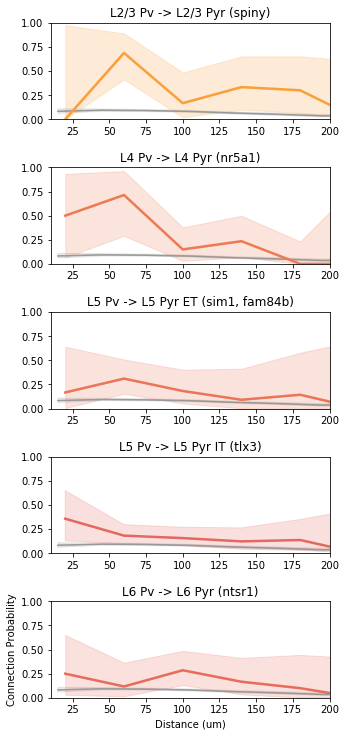

In [24]:
from aisynphys.ui.notebook import color_by_conn_prob, show_distance_profiles
%matplotlib inline
class_labels = {
    'l23pyr': 'L2/3 Pyr (spiny)',
    'l23pv':  'L2/3 Pv',
    'l4pyr':  'L4 Pyr (nr5a1)',
    'l4pv':   'L4 Pv',
    'l5et':   'L5 Pyr ET (sim1, fam84b)',
    'l5it':   'L5 Pyr IT (tlx3)',
    'l5pv':   'L5 Pv',
    'l6pyr':  'L6 Pyr (ntsr1)',
    'l6pv':   'L6 Pv',
}

dist_fig, ax = plt.subplots(len(distance_results), 1, figsize=(5,5))
colors = color_by_conn_prob(distance_results.keys(), connectivity_results, norm, cmap)
# plot connectivity vs distance for all pairs in the background
xvals, cp, lower, upper = connectivity_profile(all_connected, all_distance, np.arange(0, 500e-6, 30e-6))
xvals = (xvals[:-1] + xvals[1:])*0.5e6
for axi in ax:
    axi.plot(xvals, cp, color=(0.6, 0.6, 0.6), linewidth=1.5)
    axi.fill_between(xvals, lower, cp, color=(0.6, 0.6, 0.6, 0.2))
    axi.fill_between(xvals, upper, cp, color=(0.6, 0.6, 0.6, 0.2))
ax = show_distance_profiles(ax, distance_results, colors, class_labels)
ylim = (0,1)
xlim = (10, 200)
plt.setp(ax, xlim=xlim, ylim=ylim)
plt.subplots_adjust(top=2, hspace=0.5)

In [22]:
fname = 'C:\\Users\\stephanies\\aisynphys\\analyses\\figures\\Fig2B_F_distance_profiles.svg'
dist_fig.savefig(fname)

<Figure size 432x288 with 0 Axes>